In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import pandas as pd


In [2]:
df = pd.read_csv("Melbourne_housing.csv")
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [5]:
df.isnull().sum()
# There are too many missing values. We're gonna deal with them all.

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Working with Date
* String to Date-Time

In [6]:
#Date column is defined as object, object type to date-time conversion
format_str = '%d/%m/%Y'
formatted_date = list()
for date in df["Date"]:
    datetime_obj = datetime.datetime.strptime(date, format_str)
    formatted_date.append(datetime_obj)
df['Date'] = formatted_date
pd.to_datetime(df['Date'])

0       2016-09-03
1       2016-12-03
2       2016-02-04
3       2016-02-04
4       2017-03-04
           ...    
34852   2018-02-24
34853   2018-02-24
34854   2018-02-24
34855   2018-02-24
34856   2018-02-24
Name: Date, Length: 34857, dtype: datetime64[ns]

In [7]:
df["Date_Year"] = df["Date"].dt.year

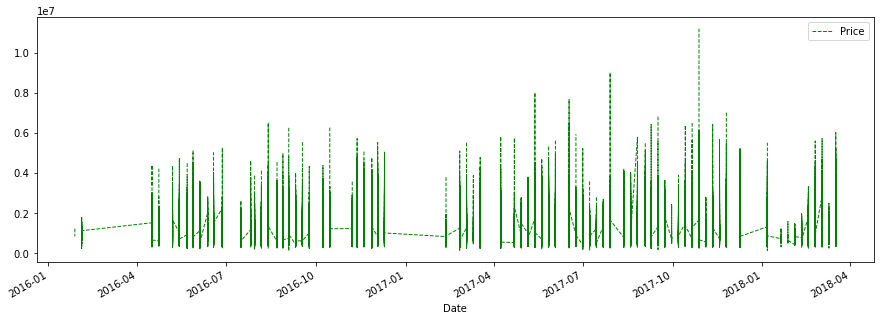

In [8]:
df.plot(x="Date",y="Price",figsize=(15,5), color='green', linewidth=1, markersize=3,linestyle='dashed')
plt.legend()
plt.show()

# Date start from 2016-01 to 2018-04. Prices are changable in time, there is no exact pattern.

## Categorical Variable Analysis

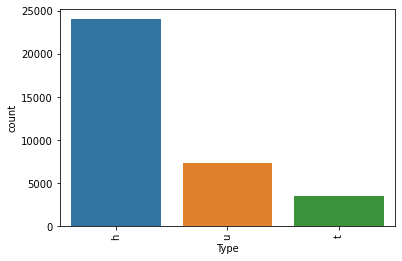

h    23980
u     7297
t     3580
Name: Type, dtype: int64




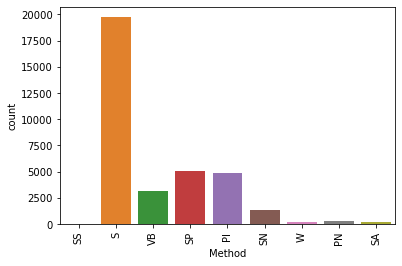

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64




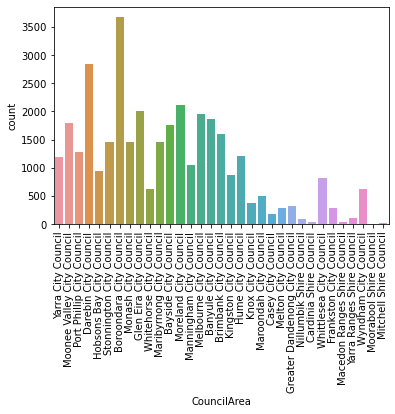

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

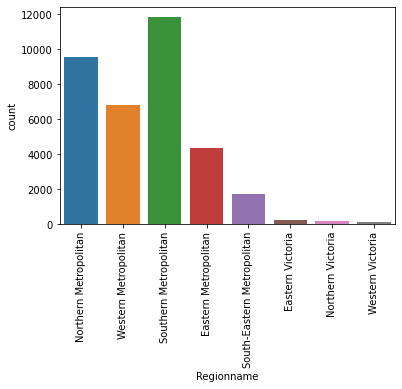

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64




In [9]:
cat_var = ['Type','Method','CouncilArea','Regionname']
for i in cat_var:
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=90)
    plt.show()
    print(df[i].value_counts())
    print('\n')

## Numerical Variable Analysis

In [10]:
numericVar = ["Rooms","Car","Price","Bathroom","Bedroom2","Distance"]

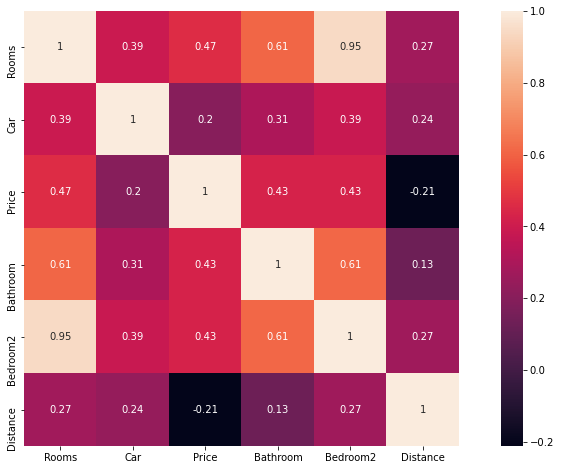

In [11]:
corrmat = df[numericVar].corr() 
plt.subplots(figsize=(15,8))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);

#Bathroom and Rooms are highly correlated --> 0.61
#Bathroom and Bedroom2 are highly correlated --> 0.61
#Rooms and Bedroom2 are highly correlated --> 0.95
#Distance and Price are negatively correlated, when the distance is higher, price gets lower.

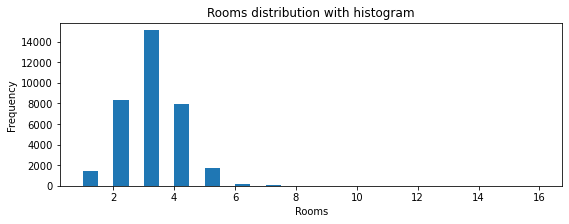

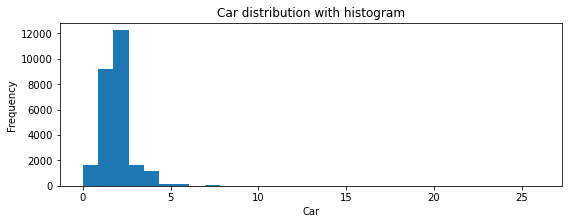

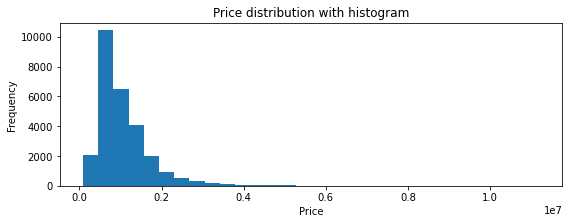

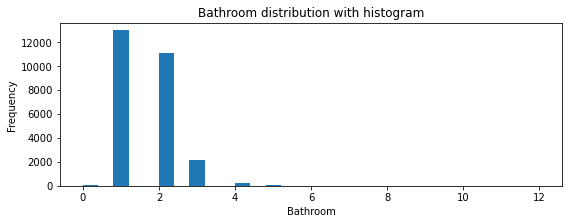

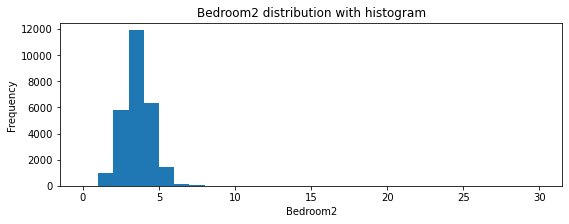

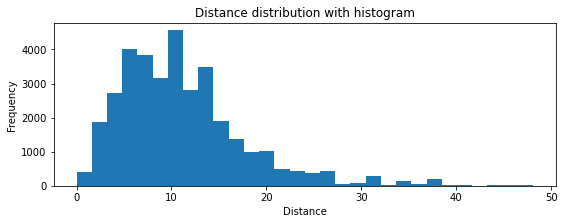

In [12]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable],bins=30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()
    
for n in numericVar:
    plot_hist(n)

## Dealing with Missing Values

### Missing Values Visualization

In [13]:
df_processed = df.drop(["Propertycount","YearBuilt","Suburb","Address","SellerG",
         "Postcode","Date","Date_Year","BuildingArea","Landsize","Method"],axis=1)
#These columns are not necessary in modeling so we're dropping them all.

In [14]:
df_processed.head()

Rooms Type      Price  Distance  Bedroom2  Bathroom  Car  \
0      2    h        NaN       2.5       2.0       1.0  1.0   
1      2    h  1480000.0       2.5       2.0       1.0  1.0   
2      2    h  1035000.0       2.5       2.0       1.0  0.0   
3      3    u        NaN       2.5       3.0       2.0  1.0   
4      3    h  1465000.0       2.5       3.0       2.0  0.0   

          CouncilArea  Lattitude  Longtitude             Regionname  
0  Yarra City Council   -37.8014    144.9958  Northern Metropolitan  
1  Yarra City Council   -37.7996    144.9984  Northern Metropolitan  
2  Yarra City Council   -37.8079    144.9934  Northern Metropolitan  
3  Yarra City Council   -37.8114    145.0116  Northern Metropolitan  
4  Yarra City Council   -37.8093    144.9944  Northern Metropolitan

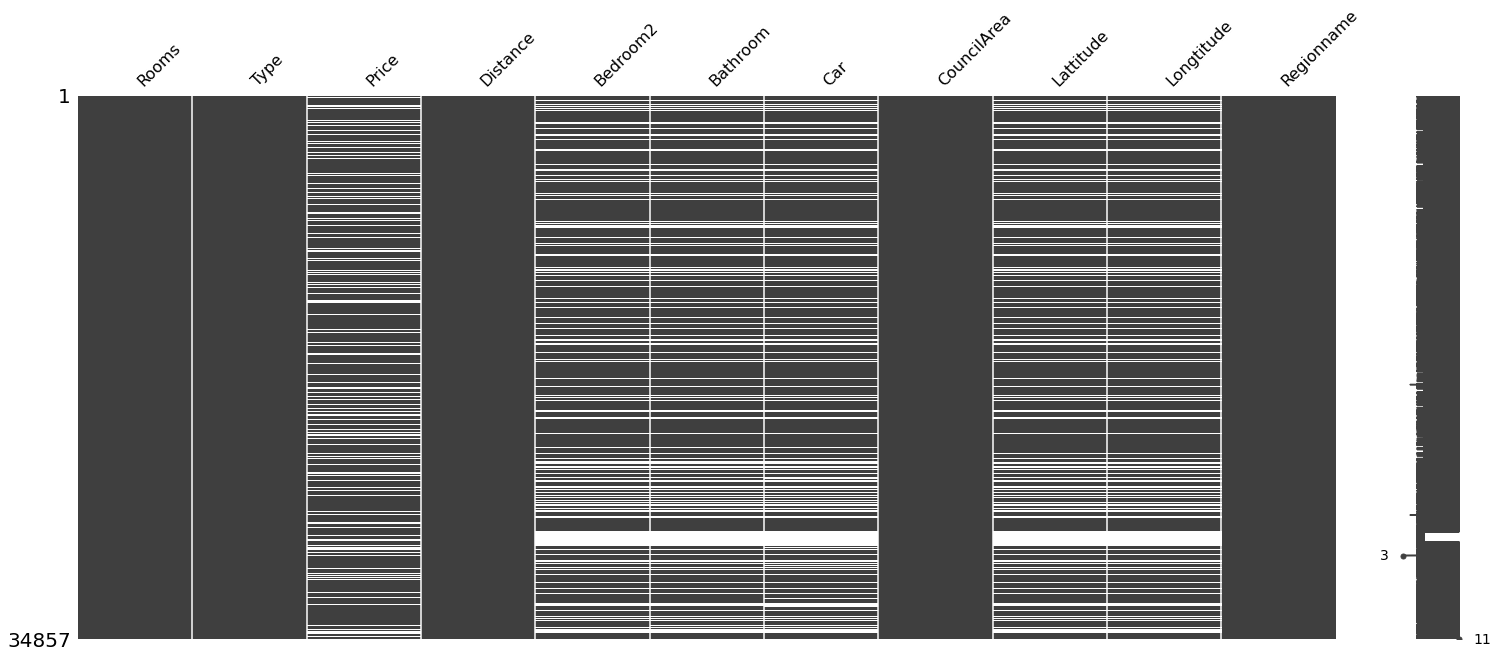

In [16]:
msno.matrix(df_processed);
# This figure indicate the missing rows in terms of all features.
# Almost the same rows of Bedroom2, Bathroom and Car features are missing when one of the feature is missing.
# On the left, 1 to 34857 represents the rows of the dataset.

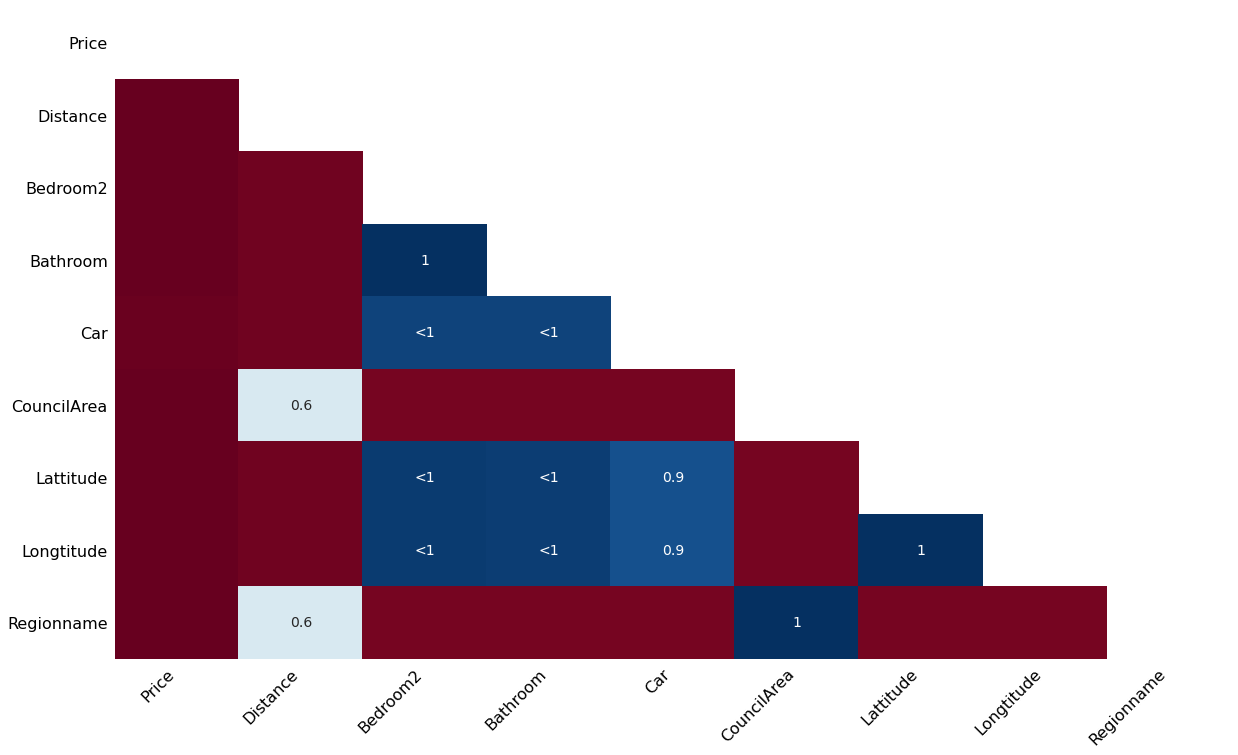

In [17]:
# Nullity Correlation Heatmap
msno.heatmap(df_processed);

* Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
* When CouncilArea is missing, regionname is also definitely missing (due to value of 1)
* When Bedroom2 is missing, Bathroom is also definitely missing (due to value of 1)